In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('notebook')

%matplotlib inline

In [2]:
customers = pd.read_csv('../data/cleaned.csv', index_col=0)
customers.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 1. Target

In [3]:
"Percentage of customers churned: %{:.2f}".format(len(customers[customers['Churn']=='Yes'])/len(customers)*100)

'Percentage of customers churned: %26.54'

In [4]:
customers['Churn'] = pd.Series(np.where(customers['Churn'].values == 'Yes', 1, 0))

## 2. Categorical features

In [5]:
def plot_churn_by_feature(feature):
    '''Create bar plot showing churn rates broken out by values of a given categorical feature name'''
    if len(customers[feature].unique())>5:
        raise Exception('Must use feature with fewer than 5 unique values')
    grouped = customers[[feature, 'Churn']].groupby(by=feature).mean().reset_index()
    sns.barplot(data=grouped, x=feature, y='Churn')
    plt.title('Churn rates by {}'.format(feature))
    plt.xlabel(' ');

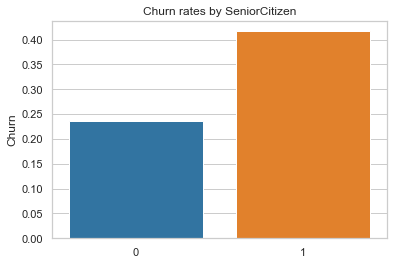

In [6]:
plot_churn_by_feature('SeniorCitizen')

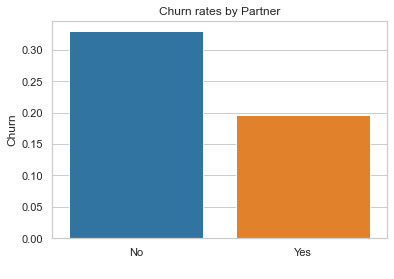

In [7]:
plot_churn_by_feature('Partner')

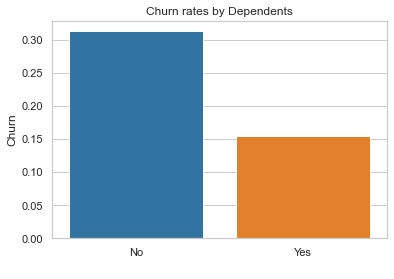

In [8]:
plot_churn_by_feature('Dependents')

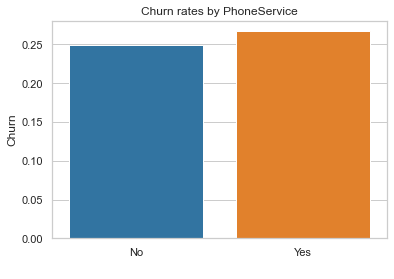

In [9]:
plot_churn_by_feature('PhoneService')

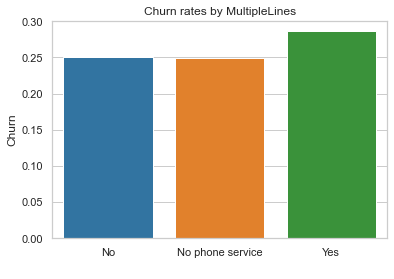

In [10]:
plot_churn_by_feature('MultipleLines')

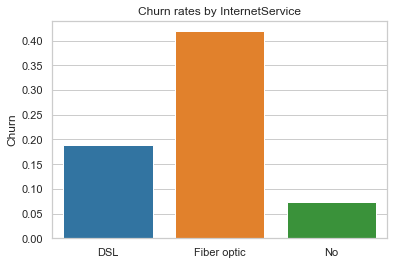

In [11]:
plot_churn_by_feature('InternetService')

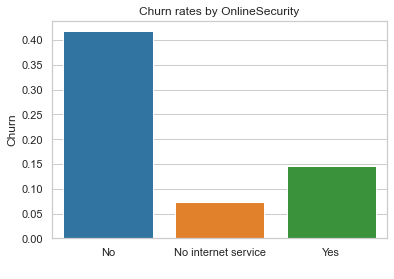

In [12]:
plot_churn_by_feature('OnlineSecurity')

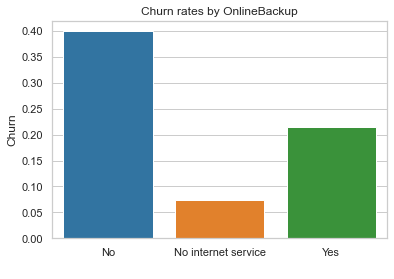

In [13]:
plot_churn_by_feature('OnlineBackup')

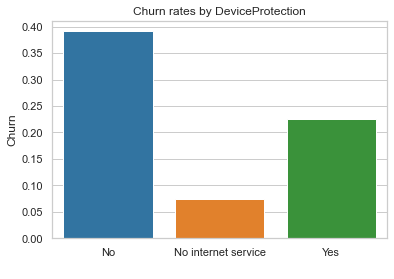

In [14]:
plot_churn_by_feature('DeviceProtection')

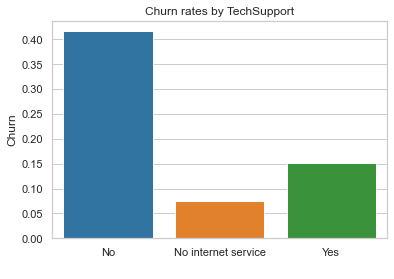

In [15]:
plot_churn_by_feature('TechSupport')

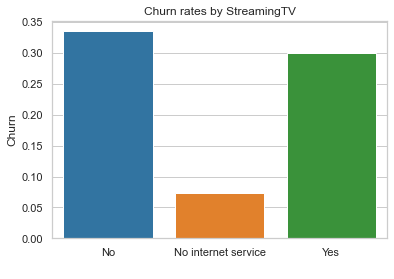

In [16]:
plot_churn_by_feature('StreamingTV')

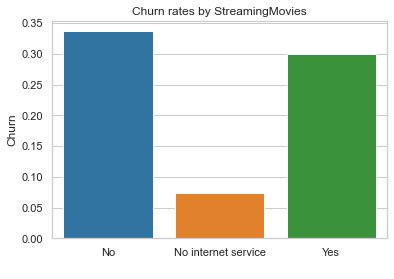

In [17]:
plot_churn_by_feature('StreamingMovies')

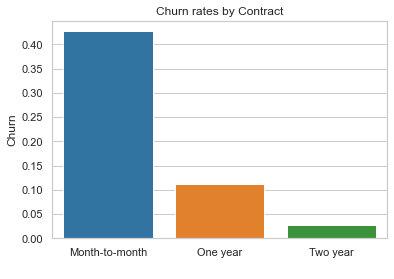

In [18]:
plot_churn_by_feature('Contract')

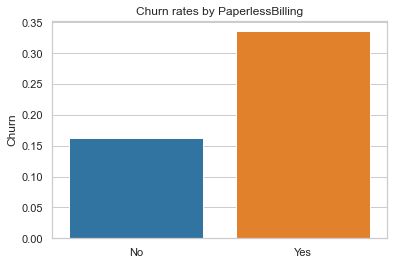

In [19]:
plot_churn_by_feature('PaperlessBilling')

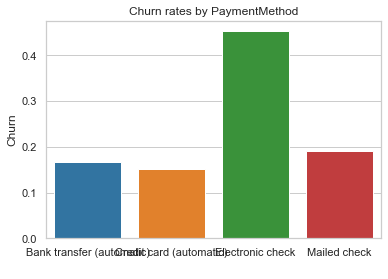

In [20]:
plot_churn_by_feature('PaymentMethod')

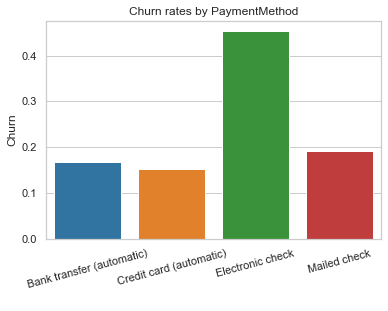

In [21]:
grouped = customers[['PaymentMethod', 'Churn']].groupby(by='PaymentMethod').mean().reset_index()
sns.barplot(data=grouped, x='PaymentMethod', y='Churn')
plt.title('Churn rates by PaymentMethod')
plt.xlabel(' ')
plt.xticks(rotation=15);

## Numerical features

### i. `tenure`

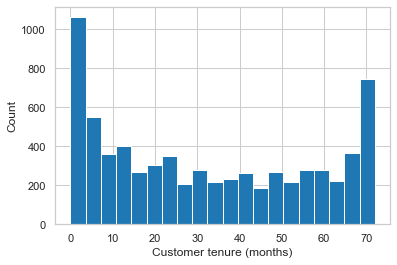

In [22]:
customers.tenure.hist(bins=20)
plt.xlabel('Customer tenure (months)')
plt.ylabel('Count');

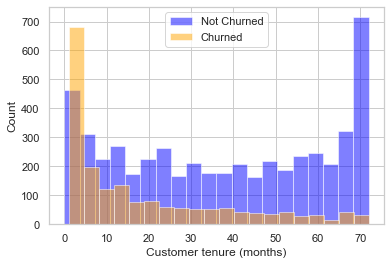

In [23]:
customers[customers['Churn']==0].tenure.hist(bins=20, color='blue', alpha=0.5, label='Not Churned')
customers[customers['Churn']==1].tenure.hist(bins=20, color='orange', alpha=0.5, label='Churned')
plt.legend()
plt.xlabel('Customer tenure (months)')
plt.ylabel('Count');

### ii. `TotalCharges`

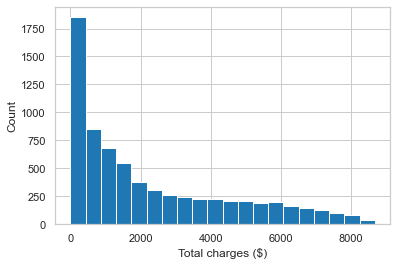

In [24]:
customers.TotalCharges.hist(bins=20)
plt.xlabel('Total charges ($)')
plt.ylabel('Count');

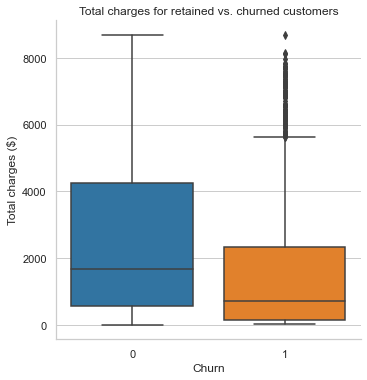

In [25]:
sns.catplot(data=customers, x='Churn', y='TotalCharges', kind='box')
plt.ylabel('Total charges ($)')
plt.title('Total charges for retained vs. churned customers');

### iii. `MonthlyCharges`

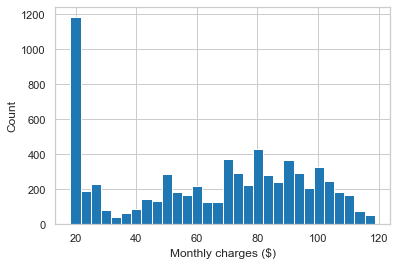

In [26]:
customers.MonthlyCharges.hist(bins=30)
plt.xlabel('Monthly charges ($)')
plt.ylabel('Count');

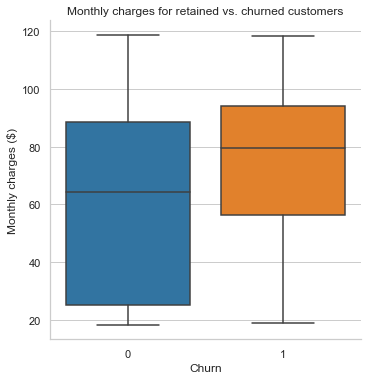

In [27]:
sns.catplot(data=customers, x='Churn', y='MonthlyCharges', kind='box')
plt.ylabel('Monthly charges ($)')
plt.title('Monthly charges for retained vs. churned customers');

## Conclusions

It seems prudent to drop MultipleLines and PhoneService, since they appear to have relatively little bearing on churn according to these bivariate analyses. We will drop these features in the upcoming preprocessing steps.